In [0]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Import all the required packages and read the dataframe into a variable called bank_df

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
bank_df = pd.read_csv('Personal_Loan_Modelling.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Explore the dataset  and do the neccessary preprocessing for the attributes and state your insights

In [0]:
bank_df.shape

(5000, 14)

In [0]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### From the dataset:
##### The dataset is found to have both numerical and categorical columns
##### 6 categorical, 1 numerical(to be treated as categorical) - ZIP code
##### ID column is of no use
##### 6 numerical columns
### The target column is 'Personal Loan'. This was infered from the problem statement.
### The dataset is highly skewed towards people who have not opted personal loan. Only 480 out of 5000 have taken a loan

In [0]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Inferences from the above data:
##### The mean and median were found to be more or less the same for the numerical columns
##### Income column is highly skewed towards a higher income value
##### Checking the statistical information after preprocessing will give us a better understanding

### Discripencies found:
1. Person with no credit card is has non-zero CCAvg(Average amount spent on credit card)
2. Experience in years is negative


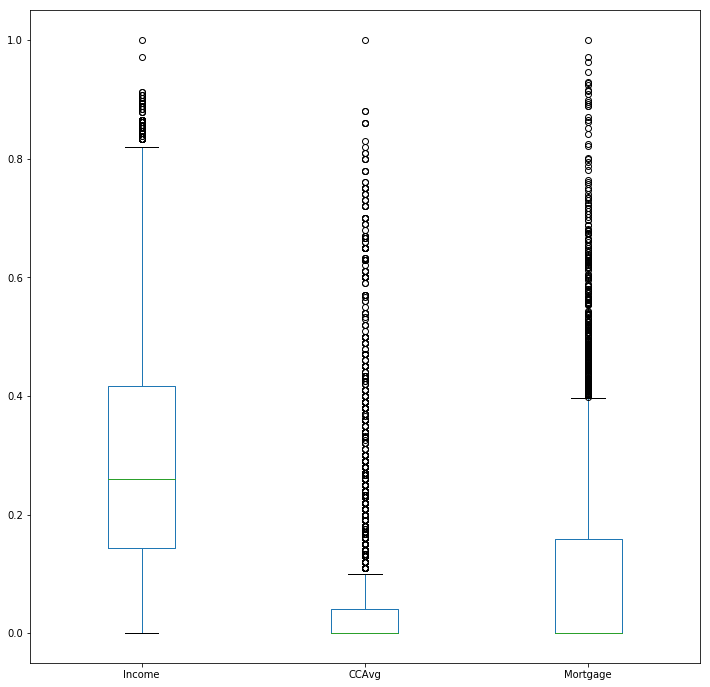

In [0]:
temp = bank_df[['Income', 'CCAvg', 'Mortgage']]
temp.plot(kind='box', figsize=(12,12))

#### The above box plots imply the high biasness in certain columns. These columns were plotted because they were found to have skewness and possible outliers from the "bank_df.describe()" command.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


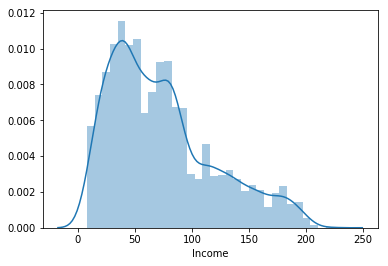

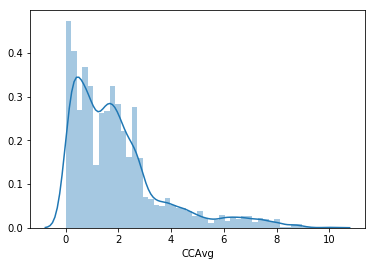

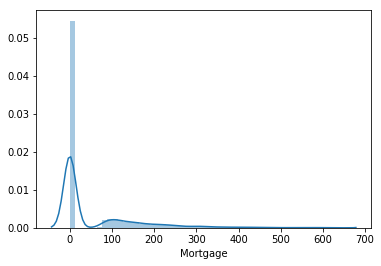

In [0]:
for i in ['Income', 'CCAvg', 'Mortgage']:    
    plt.figure()
    sns.distplot(bank_df[i])

#### This plot is to check for the skewness and to check the biasness in the data.

In [0]:
# Person with no credit card is has non-zero CCAvg
bank_df['CCAvg'] = bank_df['CCAvg']*bank_df['CreditCard']
bank_df.head()

# The discrepency was found to be removed

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,0.0,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,0.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,0.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,0.0,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### Dropping the negative values could be a solution for the discripency 2. But vouching to a customer who would not be interested is better than not vouching to a potential customer. Therefore, we can take the absolute value of the negative values. There is also the chance of the positive value being entered as a negative value(human data entry error).

In [0]:
# Experience in years is negative
bank_df['Experience'] = bank_df['Experience'].abs()
bank_df['Experience'].min()

# The discrepency was found to be removed

0

##### Checking whether the family column has any 0 values(no member in the family). No issues were found.

In [0]:
bank_df['Family'][bank_df['Family']==0].count()

0

##### Checking whether to encode the zipcode column. All the 5000 people are from one of these 467 regions. This could play a vital role in deciding which area to target inorder to get more customers. Therefore, we can encode our ZIP code column.
##### Onehot encoding cannot be done because of a high quantity of unique values

In [0]:
bank_df['ZIP Code'].unique().shape

(467,)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [0]:
label_encoder = LabelEncoder()
bank_df['ZIP Code'] = label_encoder.fit_transform(bank_df['ZIP Code'])
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,83,4,0.0,1,0,0,1,0,0,0
1,2,45,19,34,34,3,0.0,1,0,0,1,0,0,0
2,3,39,15,11,367,1,0.0,1,0,0,0,0,0,0
3,4,35,9,100,298,1,0.0,2,0,0,0,0,0,0
4,5,35,8,45,96,4,1.0,2,0,0,0,0,0,1


##### Now scaling has to be done because the column values are of different ranges. This will lead to wrong feature selection when variance is considered without scaling.

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
for column in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']:
    bank_df[column] = scaler.fit_transform(bank_df[[column]])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\sit

In [0]:
bank_df.head()
# The values have been scaled to the range 0-1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.045455,0.023256,0.189815,83,1.000000,0.0,0.0,0.0,0,1,0,0,0
1,2,0.500000,0.441860,0.120370,34,0.666667,0.0,0.0,0.0,0,1,0,0,0
2,3,0.363636,0.348837,0.013889,367,0.000000,0.0,0.0,0.0,0,0,0,0,0
3,4,0.272727,0.209302,0.425926,298,0.000000,0.0,0.5,0.0,0,0,0,0,0
4,5,0.272727,0.186047,0.171296,96,1.000000,0.1,0.5,0.0,0,0,0,0,1


#### Removal of outliers -- The general notion is that people with high income would not opt for personal loan. This idea can be used as the base for not removing the outliers. The higher the income, the lower the chance of them getting a loan.

Before outlier removal:
    Count of people who took perosnal loan = 480

After outlier removal:
    Count of people who took perosnal loan = 438
    
### This proves that removing outliers further increases the bias in the dataset. Therefore, outliers were not removed. It also proves that people with high income also take personal loans which disproves the above general notion.

In [0]:
# bank_df['Personal Loan'].sum()

In [0]:
# for outlier in ['Income']:
#     q1 = bank_df[outlier].quantile(0.25)
#     q3 = bank_df[outlier].quantile(0.75)
#     iqr = q3-q1
#     a = q1-1.5*iqr
#     b = q3+1.5*iqr
#     bank_df = bank_df[bank_df[outlier]>a]
#     bank_df = bank_df[bank_df[outlier]<b]

In [0]:
bank_df.shape

(5000, 14)

# Separate the independent attributes and store them in X array. Store the target column into Y array

In [0]:
data_columns = list(bank_df.columns)
data_columns

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

### It was infered from the problem statement that 'Personal Loan' is the target column

In [0]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.750000,2500.500000,3750.250000,5000.0
Age,5000.0,0.507691,0.260526,0.0,0.272727,0.500000,0.727273,1.0
Experience,5000.0,0.468247,0.265470,0.0,0.232558,0.465116,0.697674,1.0
Income,5000.0,0.304510,0.213119,0.0,0.143519,0.259259,0.416667,1.0
ZIP Code,5000.0,239.664400,130.850803,0.0,131.000000,254.000000,352.000000,466.0
Family,5000.0,0.465467,0.382554,0.0,0.000000,0.333333,0.666667,1.0
CCAvg,5000.0,0.056443,0.128234,0.0,0.000000,0.000000,0.040000,1.0
Education,5000.0,0.440500,0.419935,0.0,0.000000,0.500000,1.000000,1.0
Mortgage,5000.0,0.088974,0.160179,0.0,0.000000,0.000000,0.159055,1.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.000000,0.000000,0.000000,1.0


In [0]:
X = bank_df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = bank_df[['Personal Loan']]

# Apply Principal Component Analysis on the explored attributes and select the features that are explaining 95% variance of the data distribution and show the feature importance

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(0.95)

In [0]:
pca_data = pca.fit_transform(X)

In [0]:
pca_data.shape

(5000, 1)

In [0]:
pca.explained_variance_ratio_

array([0.99993304])

#####  Here, just one column explains 99% of the vairance. This may lead to over-fitting of the model to the given data. But the following accuracy scores imply that the model was not over-fit upon the data

# Create the training and test data set in the ratio of 70:30 respectively and set the random_state as 42.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.3, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 1)
(1500, 1)
(3500, 1)
(1500, 1)


# Build a Logistic Regression Model to predict the personal loan affinity

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(logistic_regression.score(X_train, y_train), logistic_regression.score(X_test, y_test))

0.9077142857142857 0.8953333333333333


# Print the confusion matrix and state your insights about the performance of the model

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = logistic_regression.predict(X_test)
a = confusion_matrix(y_test, y_pred, labels=[0, 1])

In [0]:
y_pred.sum()

0

#### From the confusion matrix we can see the Logistic regression model predicted that, no customer will take a personal loan. Even then the accuracy is higher than that of other models because of the high biasness of the data and not because of the performance of the model.

#### True Positive - 157
#### True Negative - 1343

# Build a k Nearest Neigbours Classifier Model to predict the personal loan affinity (Provide the k Value as 3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
print(model_knn.score(X_train, y_train), model_knn.score(X_test, y_test))

0.912 0.8753333333333333


# Print the confusion matrix and state your insights about the performance of the model

In [0]:
y_pred = model_knn.predict(X_test)
b = confusion_matrix(y_test, y_pred, labels=[0, 1])

In [0]:
y_pred.sum()

32

#### From the confusion matrix we can see that the KNN model has performed better than the above Logistic regression model. This has predicted 1 potential customer who might take loan and misclassified 156 potential customers. This may prove as a problem for the bank.

# Apply Random Forest Classifier Method and keep the number of estimators as 10 and check if there is any improvement in the model performance. State your insights

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
print(random_forest.score(X_train, y_train), random_forest.score(X_test, y_test))

0.956 0.834


In [0]:
y_pred = random_forest.predict(X_test)
c = confusion_matrix(y_test, y_pred, labels=[0, 1])

In [0]:
y_pred.sum()

110

#### From the confusion matrix we can see that the random forest model has performed better than the above Logistic regression model and KNN model. This has predicted 9 potential customer who might take loan and misclassified 148 potential customers. This may prove as a problem for the bank.

# Compare the performance of the three models you have designed and state your conclusions so as to finalize which model can be taken for solving the problem statement

In [0]:
final_array = [a[1,0], b[1,0], c[1,0]]
final_array

[157, 156, 148]

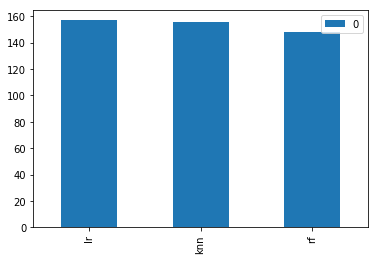

In [0]:
pd.DataFrame(final_array, index=['lr', 'knn', 'rf']).plot(kind='bar')

### For the above problem if we go by accuracy to choose a model, we will choose Logistic regression model. But the classification was done wrongly as infered from the confusion matrix. So, this implies that which model gives the least Type-2 error has to be chosen. In this scenario, it is the Random Forest model. One more reason to choose this model is because the underlying concept in this model is Decision Tree. The decision tree classifier is data dependent and not function dependent like Logistic regression.

#### Why least type-2 error? -- Potential customers are classified as csutomers who will not take loan resulting in lost revenue as compared to when a non-potential customer is called.